<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/CNN_MNIST_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imágenes con CNN: Reconocimiento de dígitos manuscritos

## Introducción al problema
El objetivo de este ejercicio es implementar una red neuronal convolucional (CNN) para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos MNIST. Este conjunto contiene 60.000 imágenes para entrenamiento y 10.000 para prueba, cada una de 28x28 píxeles en escala de grises.

Las CNN son especialmente útiles en este contexto porque pueden aprender patrones espaciales locales, como curvas y líneas, que caracterizan visualmente los dígitos manuscritos.


## Carga y preprocesamiento de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar a valores entre 0 y 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Cambiar la forma para que tenga canal (28, 28, 1)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encoding de las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (60000, 28, 28, 1)
Tamaño del conjunto de prueba: (10000, 28, 28, 1)


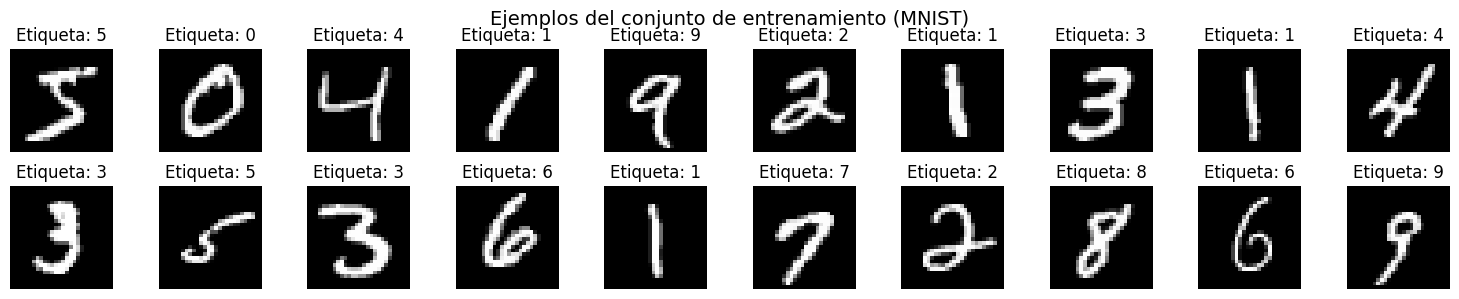

In [2]:
# Visualización de los datos
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
fig.suptitle("Ejemplos del conjunto de entrenamiento (MNIST)", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Etiqueta: {np.argmax(y_train[i])}")
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("ejemplos_mnist_procesados.png")
plt.show()


## Definición y entrenamiento del modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir el modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8552 - loss: 0.4972 - val_accuracy: 0.9783 - val_loss: 0.0673
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9804 - loss: 0.0626 - val_accuracy: 0.9867 - val_loss: 0.0510
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.9882 - val_loss: 0.0409
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.9899 - loss: 0.0327 - val_accuracy: 0.9895 - val_loss: 0.0351
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9930 - loss: 0.0246 - val_accuracy: 0.9893 - val_loss: 0.0377


## Evaluación del rendimiento

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9865 - loss: 0.0385
Precisión en el conjunto de prueba: 0.9903


El resultado obtenido fue una precisión de prueba de 0.9903, lo que equivale a una tasa de aciertos del 99.03 %. Además, se reportó una función de pérdida de 0.0385, lo cual indica que el modelo presenta una baja discrepancia entre las predicciones realizadas y las etiquetas verdaderas del conjunto de prueba.

## Análisis e interpretación de resultados

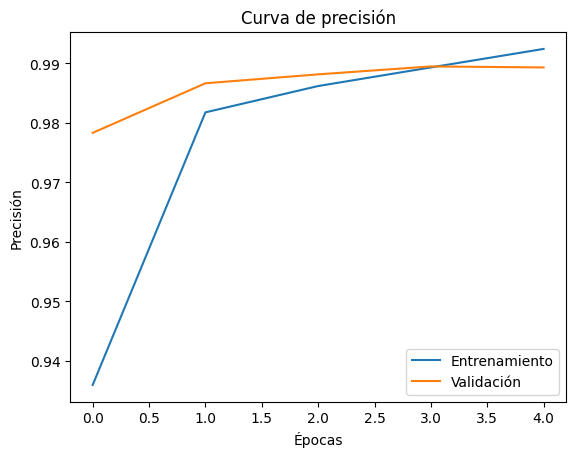

In [ ]:
# Curvas de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

La gráfica muestra la evolución de la precisión (accuracy) del modelo CNN durante el entrenamiento en el conjunto de datos MNIST, evaluada tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación, a lo largo de 5 épocas.


* **Crecimiento rápido de precisión desde la primera época:**  Desde el inicio, ambas curvas (entrenamiento y validación) presentan un crecimiento pronunciado. Esto es esperable dado que el conjunto MNIST es relativamente sencillo y los patrones visuales de los dígitos son consistentes y repetitivos. El modelo aprende rápidamente a reconocer las estructuras básicas de los dígitos.

*  **Desempeño alto y estable:**   La precisión del conjunto de validación se mantiene alrededor del 99 % desde la segunda época, lo cual sugiere una muy buena capacidad de generalización del modelo. La curva de entrenamiento sigue ascendiendo levemente, alcanzando valores apenas superiores al 99 %.

*  **Ausencia de sobreajuste significativo:**  A diferencia de otros escenarios comunes en redes neuronales, aquí no se observa una brecha significativa entre entrenamiento y validación, lo que indica que el modelo no está sobreajustando. El comportamiento paralelo de ambas curvas es una señal positiva de que el aprendizaje es consistente y equilibrado.

*   **Posible convergencia temprana:**   Dado que la curva de validación se estabiliza rápidamente y no mejora significativamente después de la segunda o tercera época, es razonable pensar que el modelo ha convergido a una solución óptima en pocas iteraciones. Esto abre la posibilidad de usar técnicas como early stopping para evitar entrenamiento innecesario.